# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X[:, 2])

[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X[:, 1])

[0.0 0.0 0.0 ... 0.0 1.0 0.0]


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [17]:
history = ann.fit(X_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 100)

Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7503 - val_loss: 0.4768 - val_accuracy: 0.7962
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7953 - val_loss: 0.4569 - val_accuracy: 0.7950
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7961 - val_loss: 0.4453 - val_accuracy: 0.7950
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7960 - val_loss: 0.4374 - val_accuracy: 0.7950
Epoch 5/100
225/225 [==============================] - 0s 997us/step - loss: 0.4402 - accuracy: 0.7961 - val_loss: 0.4310 - val_accuracy: 0.7950
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7961 - val_loss: 0.4238 - val_accuracy: 0.7950
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.7957 - val_loss: 0.4178 - val_accuracy: 0.79

# Visualization of the Loss of training

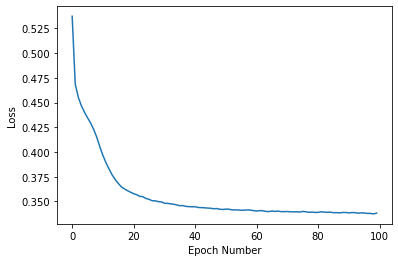

In [25]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

# Visualization of the Accuracy of training

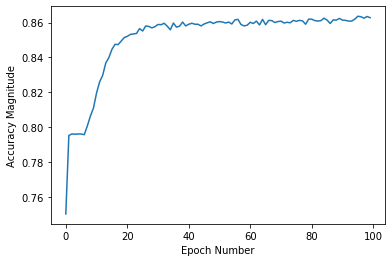

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['accuracy'])

# Visualization of the Loss of validation VS loss of training

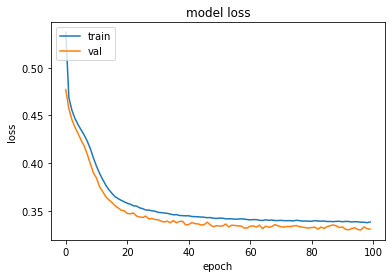

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualization of the Accuracy of validation VS Accuracy of training

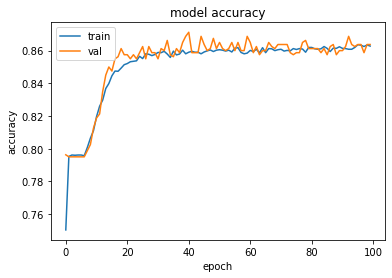

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1513   82]
 [ 194  211]]


0.862

### Predicting the result of a single observation

**Solution**

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [20]:
def single_predictor(single_features):
    features_list = []
    for sublist in single_features.values():
        if type(sublist) == list:
            for item in sublist:
                features_list.append(item)
        else:
            features_list.append(sublist)
    transform_features = sc.transform([features_list])
    my_prediction = ann.predict(transform_features)
    print(my_prediction > 0.5)

In [21]:
single_featurs = {
    'Geography': [1, 0, 0] ,
    'Credit Score': 600,
    'Gender': 1,
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'Number of Products': 2,
    'Credit Card': 1,
    'Active Member': 1,
    'Salary': 50000,
}

In [22]:
# print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
single_predictor(single_featurs)

[[False]]
